In [4]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from six.moves import input


In [6]:
def euclidian(x1,x2):
 return (np.sum((x1-x2)**2))

In [9]:
def getclass(datapoint, centroids):
 distances = np.array([euclidian(datapoint, centroid) for centroid in centroids])
 return np.argmin(distances)

In [14]:
def compute_centroids(data, centroids):
 classes = np.zeros(data.shape[0])
 # assign each data point to closest centroid
 for i in range(len(data)):
  classes[i] = getclass(data[i], centroids)

 new_centroids = np.ndarray(centroids.shape)

 for i in range(len(centroids)):
  new_centroids[i] = np.mean(data[classes==i],axis=0)


 return new_centroids, classes

In [22]:
def plotme(data, target, centroids=[], legends=False, iter=None,clear=False):
	if clear:
		plt.clf() # Draw new figure each time

	# Ref: http://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-clusters-in-a-k-means-unsupervised-learning-model/
	class_1 = data[target==0]
	class_2 = data[target==1]
	class_3 = data[target==2]


	
	if legends:
		c1 = plt.scatter(class_1[:,0], class_1[:,1],c='m',
			    marker='+')
		c2 = plt.scatter(class_2[:,0], class_2[:,1],c='m',
			    marker='o')
		c3 = plt.scatter(class_3[:,0], class_3[:,1],c='m',
			    marker='*')
		plt.legend([c1, c2, c3], ['Setosa', 'Versicolor',
	    			'Virginica'])
		plt.title('Iris dataset with 3 clusters and known outcomes')

	else:
		c1 = plt.scatter(class_1[:,0], class_1[:,1],c='r',
			    marker='o')	
		c2 = plt.scatter(class_2[:,0], class_2[:,1],c='g',
			    marker='o')
		c3 = plt.scatter(class_3[:,0], class_3[:,1],c='b',
			    marker='o')

		if centroids!=[]:
			plt.scatter(centroids[:,0],centroids[:,1],c='k',marker='x')

		plt.title('Iris dataset with 3 clusters and unknown outcomes : Iter '+str(iter))
	
	plt.pause(1)


[136 130   0]


C:\Users\Somi\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


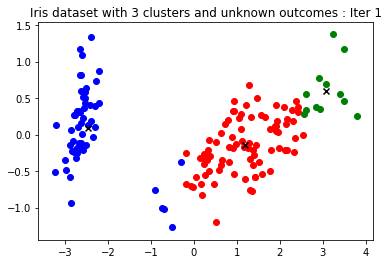

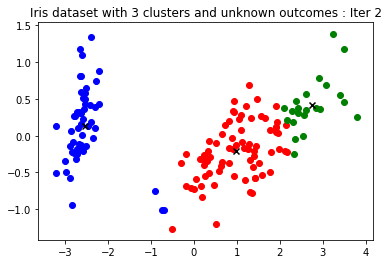

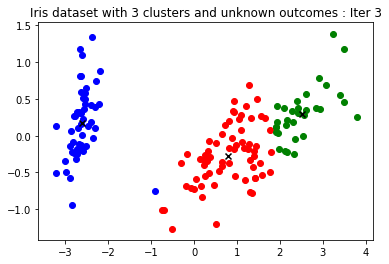

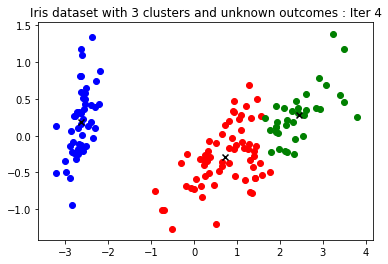

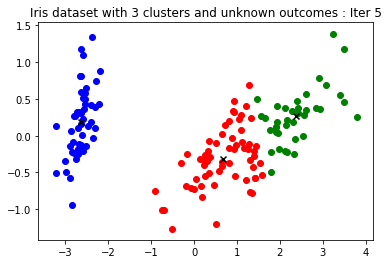

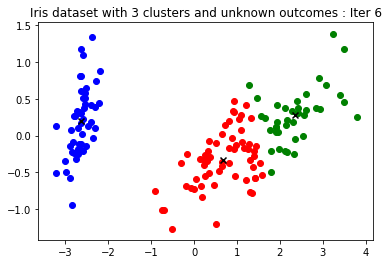

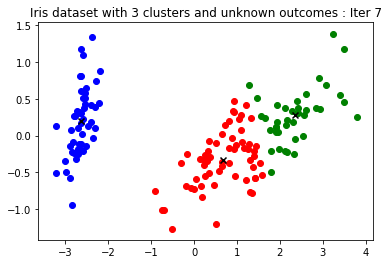

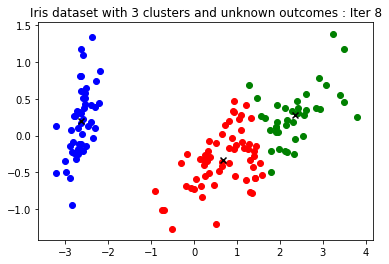

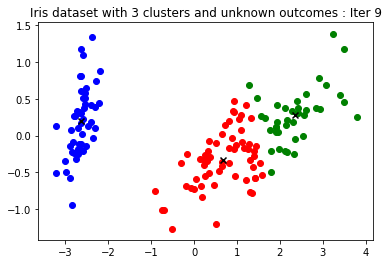

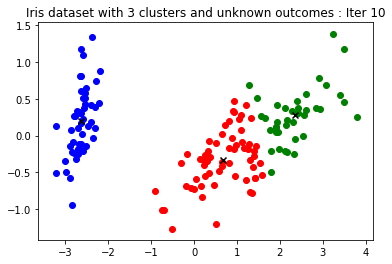

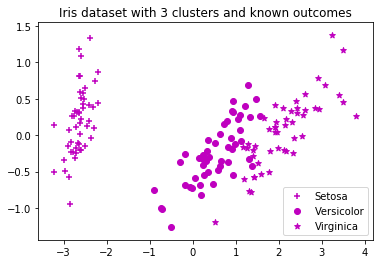

<Figure size 432x288 with 0 Axes>

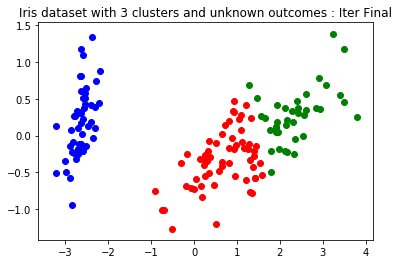

Press any key to exit:


<Figure size 432x288 with 0 Axes>

In [20]:
def kmeans(data, targets, k=2, iters=10,plotdata=None):

	# good initial centroids found by inspection
	centroid_indices = np.array([136,130,0])
	#centroid_indices = np.array([63, 53, 48])

	# bad centroids 
	# centroid_indices = np.array([19,45,63])

	# Comment the above line and uncoment the line below to
	# chooses k random different points from the dataset as intitial centroids

	# centroid_indices = random.sample(range(data.shape[0]),k)
	print(centroid_indices)
	centroids =  np.array([data[i] for i in centroid_indices])

	for it in range(iters):
		centroids, classes = compute_centroids(data, centroids)
		plotme(plotdata,classes, centroids, iter=it+1)

	plotme(plotdata, targets, centroids, legends=True, clear = True)
	plt.savefig("classes-known.jpg")
	plt.pause(4)
	plotme(plotdata, classes, iter="Final", clear = True)
	plt.savefig("classes-unknown.jpg")
	input("Press any key to exit:")

if __name__ == '__main__':

	iris = load_iris()

	# Reduce iris data from 4 dimensions to 2 for ease of plotting

	pca = PCA(n_components=2).fit(iris.data)
	pca_2d = pca.transform(iris.data)

	plt.ion() # Interactive on
	
	#You can change the first argument to iris.data and remove the centroid argument in every plotme call
	# to compute centroid on the original data, and plot on the pca reduced data
	kmeans(pca_2d, iris.target, k=len(np.unique(iris.target)), plotdata=pca_2d)
